# Project Analysis - Cohort Analysis & Layer Cake Chart

## 1.Proposal

**Aim**: <p align='orientation'> To conduct a cohort study of the paid and refunded amount of customers to monitor how acquired customers continue the product or service on a monthly or yearly basis and what does the montly revenue is highly dependent on. </p>

**Objectives**: <p align='orientation'> **Primary Objectives**: </p>
                <p align='orientation'>(1) To figure out the top 3 countries with the most customers. </p> 
                <p align='orientation'> (2) To determine the user retention for each of the top 3 country with the use of a heatmap.  </p>
                <p align='orientation'>(3) To determine the trend of customers that may have churned and acquired new customers over a fixed time period with the help of a layer cake chart.</p>
                <p align='orientation'> (4) To figure out if there was any activities contributed to the monthly revenue during the fixed time period </p>
                <p align='orientation'> **Secondary Objectives**: </p>
                <p align='orientation'> - To compare the difference of user retention between 3 countries that how the amount of customers may affected. </p>
                <p align='orientation'> - To provide the basis for future research to improve products and service. </p>

## 2. Introduction

  **In the 21st century, customers' data are becoming more and more essential, SaaS companies will be able to provide the most appropriate service to customers based on them. For this report, we are going to figure out whether the amount of revenue (paid - refunded) is related to the country that they come from. We assume that the more developed the country is, the more people are likely to spend money.**

**As we all know that US is one of the most powerful countries around the world, so our expected analysis outcome based on what we assume is citizens from US tend to spend more money. As cohort analysis gives the user an understanding of the why, how, and when of customer's actions that helps the user to make decisions, by conducting  cohort analysis, we can conclude whether there is a positive correlation that can fit our assumption.**

**To avoid bias and any other side effects, we will conduct cohort analysis on the other two top countries from the list to ensure our conclusion is evidential and reliable.**

**For further progress, we will conduct a cohort layer cake chart with no geographic separation. Layer cake chart is another type of chart used by SaaS(Software as a service). As they need to monitor monthly recurring revenue and annual recurring revenue to make decisions, it is essential to use a layer cake chart to monitor customers on a monthly or yearly basis.**

## 3. Retrieve Dataset

Datasets: customer details in 2020: https://github.com/shy1213/Project/blob/main/query_result_2021-05-18T03%2046%2057.095586Z%20(1).csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline
print('Libraries imported')

Libraries imported


In [3]:
df = pd.read_csv('/Users/shy/Downloads/customer.csv')
df['created'] = pd.to_datetime(df['created'], format = '%Y-%m-%d %H:%M:%S')
df.groupby(['card__country'])['customer'].count().sort_values().tail(3)

card__country
CA    190
AU    203
US    997
Name: customer, dtype: int64

In [4]:
df.set_index('customer', inplace = True)

df['CohortGroup'] = df.groupby(level = 0)['created'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace = True)

def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

In [5]:
import seaborn as sns
def heat_map(cohort_analysis):
    sns.set(style = 'white')

    plt.figure(figsize = (12, 8))
    plt.title('Cohorts: User Retention')
    sns.heatmap(cohort_analysis.T, mask = cohort_analysis.T.isnull(), annot = True, fmt = '.0%')

In [6]:
def Cohort_Analysis(country):
    data_set_country = df[df['card__country'] == country]
    data_set_country['Period'] = data_set_country['created'].apply(lambda x: x.strftime('%Y-%m'))
    data_set_country.set_index('customer', inplace = True)
    data_set_country['CohortGroup'] = data_set_country.groupby(level = 0)['created'].min().apply(lambda x: x.strftime('%Y-%m'))
    data_set_country.reset_index(inplace = True)
    
    
    grouped = data_set_country.groupby(['CohortGroup', 'Period'])
    cohorts = grouped.agg({'paid': np.sum,
                      'refunded': np.sum,
                      'customer': pd.Series.nunique})

    cohorts = cohorts.groupby(level = 0).apply(cohort_period)
    cohorts.reset_index(inplace = True)
    cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace = True)

    cohort_group_size = cohorts['customer'].groupby(level = 0).first()
    user_retention = cohorts['customer'].unstack(0).divide(cohort_group_size, axis = 1)
    
    return user_retention

### 3.1 US Cohort Analysis

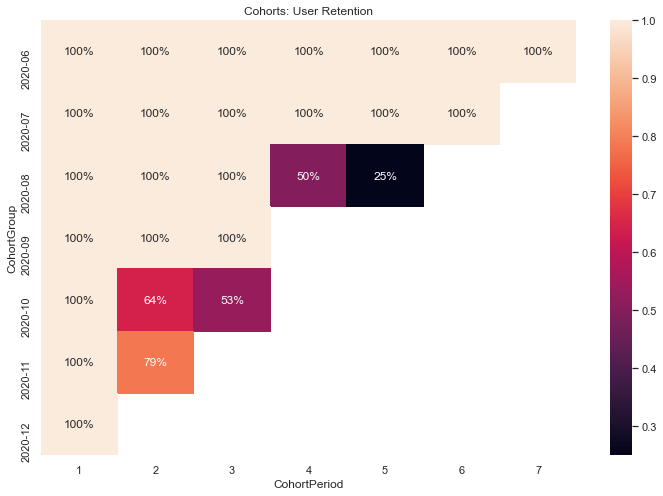

In [7]:
heat_map(Cohort_Analysis('US'))

### 3.2 AU Cohort Analysis

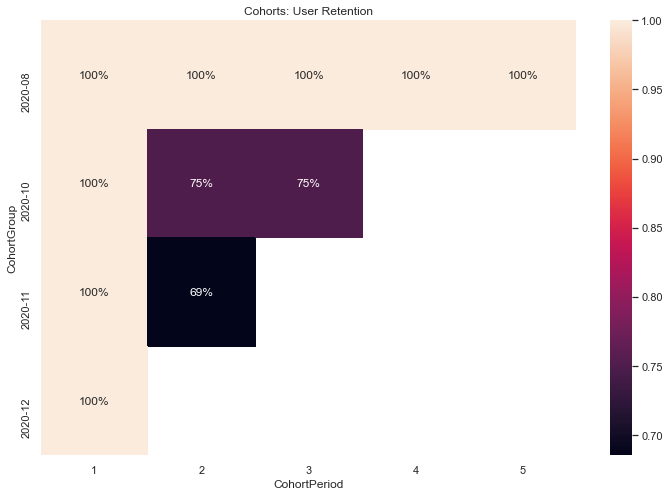

In [8]:
heat_map(Cohort_Analysis('AU'))

### 3.3 CA Cohort Analysis

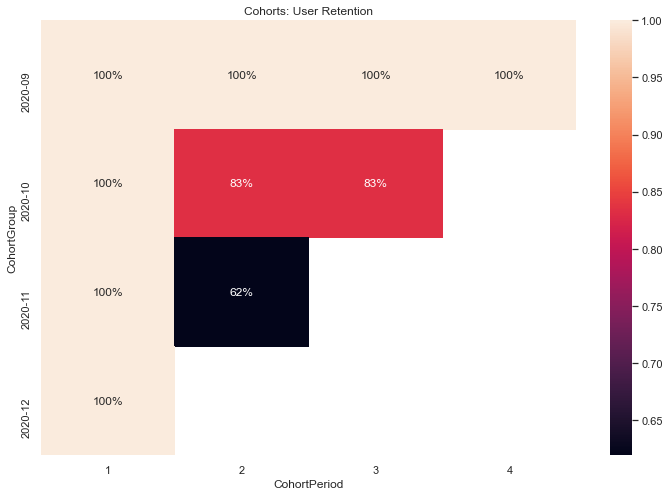

In [9]:
heat_map(Cohort_Analysis('CA'))

## 4.Layer Cake Chart 

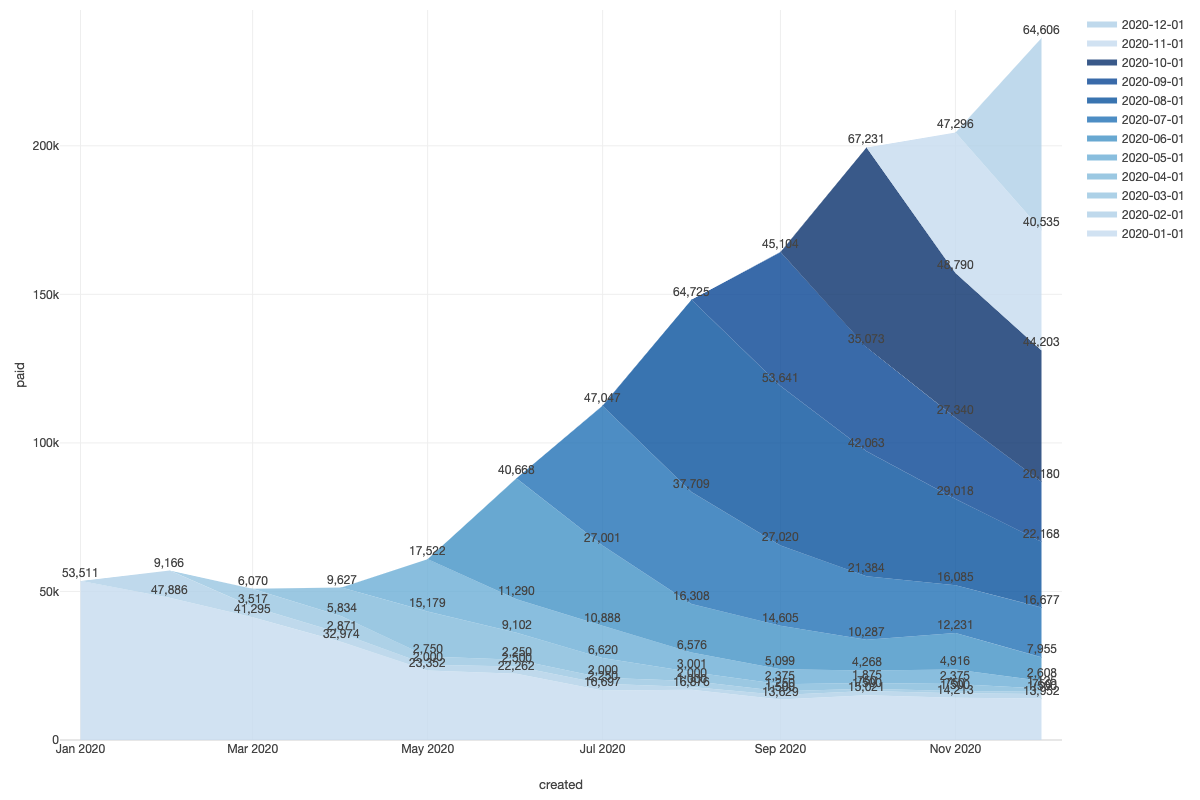

In [11]:
from IPython import display
display.Image("/Users/shy/Downloads/Cake_Chart.png")

From the graph, it could be seen that monthy revenue is highly dependent on new customers. However, the company accumulates several layers of incomes from existing customers and reduced dependence. Further more, it seems like there was activities like promo happended in Nov 2020 and a few cohorts responded.

## 5. Conclusion